# PyTorch training loop and Testing loop

For the training loop, we'll build the following steps:

1. Forward pass
2. Calculate the loss
3. 	Zero gradients
4. Perform backpropagation on the loss
5. Update the optimizer (gradient descent)

In [1]:
import torch
import numpy as np
import seaborn as sns
from torch import nn

torch.manual_seed(42)

X = np.linspace(0,20,num=200)
y = X + np.sin(X)*2 + np.random.normal(size=X.shape)

<Axes: >

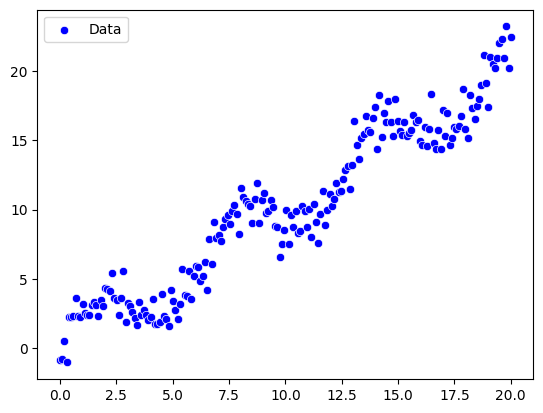

In [2]:
sns.scatterplot(x=X,y=y,color='Blue', label='Data')

In [3]:
from torch.utils.data import Dataset , DataLoader

class Simple1DRegressionDataset(Dataset):
    def __init__(self,X,y):
        super(Simple1DRegressionDataset,self).__init__()
        self.X = X.reshape(-1,1)
        self.y = y.reshape(-1,1)

    def __getitem__(self,index):
        return torch.tensor(self.X[index,:],dtype=torch.float32) , torch.tensor(self.y[index,:],dtype=torch.float32)

    def __len__(self):
        return self.X.shape[0]

In [4]:
df = Simple1DRegressionDataset(X,y)


In [5]:
df[0]


(tensor([0.]), tensor([-0.8526]))

In [6]:
training_loader = DataLoader(Simple1DRegressionDataset(X,y),shuffle=True)

In [7]:
data_point = next(iter(training_loader))
data_point


[tensor([[8.8442]]), tensor([[9.0081]])]

In [8]:
# construct the model using Linear block
in_features = 1
out_features = 1
model_2 = nn.Linear(in_features,out_features)


In [59]:
model_2=nn.Sequential(
    nn.Linear(1, 128),
    nn.Tanh(),
    nn.Linear(128, 128),
    nn.Tanh(),
    nn.Dropout(0.1),
    nn.Linear(128, 64),
    nn.Tanh(),
    nn.Linear(64, 32),
    nn.Tanh(),
    nn.Linear(32,1)
)



In [60]:
loss_fn = nn.MSELoss()

In [61]:
optimizer = torch.optim.SGD(params=model_2.parameters(),lr=0.001)

In [62]:
# so we need now a training loop
from tqdm.autonotebook import tqdm

def train_simple_network(model,
                        loss_fn,
                        training_loader,
                        epochs=5,
                        device='cpu',
                        optimizer=optimizer):

    optimizer = torch.optim.SGD(params=model.parameters(),lr=0.001)

    model.to(device)

    for epoch in tqdm(range(epochs), desc="Epochs"):

        model = model.train()

        running_loss = 0

        for inputs , labels in tqdm(training_loader,desc='Batches'):

            inputs = inputs.to(device)
            labels = labels.to(device)

            optimizer.zero_grad()

            y_pred = model(inputs)

            loss = loss_fn(y_pred, labels)

            loss.backward()

            optimizer.step()

            running_loss += loss.item()
            print(running_loss)



In [63]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cpu'

In [64]:
train_simple_network(model_2,
                loss_fn,
                training_loader,
                device=device,
                epochs=10
                )


Epochs:   0%|          | 0/10 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

349.4556579589844
521.8263854980469
525.5448846817017
607.4986810684204
614.0664048194885
693.6864228248596
893.3746247291565
958.9131684303284
1038.1915497779846
1051.7980151176453
1140.7220187187195
1180.0617594718933
1244.0052828788757
1251.4436531066895
1274.415864944458
1321.4640560150146
1512.6590023040771
1571.6267795562744
1708.337839126587
1717.818302154541
1810.472843170166
1821.2891273498535
1950.8740272521973
2080.6532020568848
2207.7050437927246
2210.1892414093018
2221.850269317627
2339.9970054626465
2393.331844329834
2393.859210908413
2410.170494019985
2410.361291602254
2437.801850989461
2478.5442788153887
2478.7114548385143
2585.4360794723034
2585.447758265771
2587.631767817773
2600.5269160950556
2617.8953624451533
2792.1071086609736
2812.3986507141963
2817.022182532586
2852.2417832100764
2866.2889452660456
2871.247020789422
2910.5798760140315
2929.6084919655696
2929.7701691621915
2956.233555697836
2976.649710559286
2977.979779982008
3006.8788011306897
3008.6616883510724

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

2.4801406860351562
65.97345733642578
69.79161238670349
95.31190848350525
98.57767152786255
143.22042512893677
143.23557974770665
179.06516196206212
209.5753567405045
209.60870508104563
217.48852924257517
240.09569362550974
240.12203990481794
247.4341431763023
248.9421076681465
251.65525793097913
284.06324743293226
296.0314357187599
328.4553859140724
332.9949500467628
419.3206717874855
419.4490986671299
419.5705763529986
420.1164060663432
459.64297543279827
459.71451378427446
461.05506253801286
563.6443951185793
569.7164466436952
583.2591292914003
605.1956355627626
608.0995781477541
609.0281751211733
677.8468778189272
704.2361962851137
705.5417829807848
762.7817808445543
763.1930149849504
767.4239291008562
767.5437817182392
783.1492561902851
808.2409252729267
814.0110582914203
817.4540350046009
818.1641075816005
819.4318298306316
820.6204800810665
820.6211926665856
821.8419848409249
836.5364638295723
837.1544146266533
837.434408309753
839.1627168682171
861.5878973033978
861.747597309644

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.9442504048347473
15.934505760669708
23.322892487049103
23.684758752584457
24.99702689051628
29.383685559034348
30.904903143644333
38.95028755068779
40.05690535902977
46.07560262084007
49.81296667456627
50.72986879944801
65.50560274720192
132.20173159241676
183.34388628602028
185.41678896546364
258.4543561041355
292.6467198431492
306.66702261567116
308.3583052456379
326.3774302303791
327.7242116034031
328.70637729763985
333.7012851536274
335.20873203873634
335.22502687200904
340.1393969319761
340.7254314683378
401.08052637800574
429.9264488480985
432.0708499215543
433.3334597609937
541.2617281936109
551.5637101195753
589.3170403502882
589.8769113086164
590.796659257263
591.7518186829984
625.8799810670316
625.9044745434076
659.034105585888
720.9448569286615
721.6408768761903
721.7471119780093
732.8111464399844
742.960137071088
775.5206000227481
788.334685029462
869.5887743849307
882.6638380903751
882.9862669426948
884.5306155402213
884.5648885238916
888.8487134445459
889.9523396957666


Batches:   0%|          | 0/200 [00:00<?, ?it/s]

1.3315845727920532
1.3551513850688934
1.3653122251853347
1.637178367935121
6.016399807296693
6.196491978131235
10.091217777691782
10.471648058854043
34.46430095192045
35.205101571045816
36.92075046058744
37.47418811079115
38.03194453474134
40.61128761526197
42.95225097890943
56.98701812978834
60.42547323461622
63.08916165586561
68.53792931791395
69.1784042334184
107.901327512227
107.91055879928172
112.96537981368601
113.90250525809824
120.3632744345814
123.53081450797617
125.2502304110676
125.67916730977595
136.57442525960505
159.80020383931696
160.2516800854355
168.2518250439316
168.28250278905034
168.28928773105145
168.53926388919353
169.50349120795727
171.74026779830456
175.04305104911327
183.5518887490034
216.55374650657177
228.9893010109663
234.46733455359936
268.9654119461775
269.14050306379795
269.2133410125971
291.06700541079044
292.7579556852579
296.3460039049387
306.734959974885
306.8599545955658
314.19018387794495
320.89323687553406
324.48531198501587
324.5170444585383
326.7

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

25.848312377929688
28.792876958847046
56.110431432724
63.13638186454773
63.60162967443466
72.93899196386337
85.79208606481552
99.77292960882187
100.32448559999466
120.26034528017044
130.50104027986526
141.98815137147903
142.25623813271523
156.16209235787392
160.51103988289833
225.66087356209755
258.5216638147831
278.7271844446659
305.05518355965614
382.7258988916874
382.73676575161517
385.8224040362984
386.783162066713
426.7532281372696
462.80782408453524
463.40747178532183
465.06698108650744
467.3284368608147
467.3405745802447
504.0431693373248
518.7808907805011
524.1852820692584
547.7491267500445
616.8629267988726
620.2668684301898
625.0678318319842
625.7292563496158
685.3306204853579
693.19343157392
702.2468659458682
745.1020066319034
750.1943594990298
819.2371985493228
854.6941115437075
855.6083586392924
886.8736384091899
934.3265726743266
1067.9917643247172
1071.0113606629893
1074.9148807702586
1088.514147776179
1088.8167508123443
1091.9287360189483
1124.4195387838408
1131.6653573

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

1.0847065448760986
7.382495641708374
9.46858549118042
10.470281839370728
12.849198341369629
75.40053653717041
75.40344593836926
80.91295025660656
81.75054083182476
100.47341833426617
101.31257239892147
101.39517568214796
167.51437734230421
200.98345922096632
205.10324786766432
222.48324130638503
227.97287772758864
229.76316081150435
243.1349965201225
275.48958407505415
291.6339207754936
292.4706920252647
307.99818168743514
317.39555584057234
322.27678142650984
326.1576787100639
380.74150668247603
439.1484814749565
448.59307013615035
454.9388228522148
504.94612799747847
507.3199196921196
513.4375215636101
513.6391188220587
532.3904635028448
556.8764044360723
558.7703510837164
626.1804844455328
626.7401944713201
632.4989291743841
632.5950992198195
634.3401404710021
637.1840676160064
647.922724613687
705.7580174298491
706.407480844995
732.5096174569335
735.9364639611449
736.065538281342
740.3274863900151
743.7015854062047
743.7871690036263
744.0394374371972
761.6352511884179
780.579514646

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.49307000637054443
3.1290494203567505
3.4047801792621613
3.788510411977768
3.7891849015140906
16.456860873498954
21.16623911599163
55.54533610085491
119.98469767312054
120.32978651265148
120.50430983642582
166.64488524536137
166.65209696360398
172.20752976008225
172.3256440005498
172.5863630316453
172.97336594678927
221.0539743147092
221.1740540257888
226.96517169394065
228.7251546374755
229.08535939373542
229.15703900076915
232.43954761244822
232.8361281893449
232.97372129478026
256.5434825710254
268.7437322429614
272.10648944892455
273.62198880233336
274.2367530755
316.0645156792598
318.2306655339198
321.3609579495387
333.7503202847438
356.78857788362075
356.8363477020757
358.97768867306877
359.96007859997917
367.2117770939367
367.91990584426094
369.8229982285993
380.56966990523506
380.6209607227938
382.79790092550684
413.90953804098535
417.68907905661035
419.185681949486
433.7803970678942
440.21586955629755
440.27095978625584
443.310164383729
443.3674054919975
443.54756808571983
44

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

8.438701629638672
19.87710952758789
22.59182620048523
59.26334261894226
69.58982729911804
71.20626938343048
73.58132636547089
79.60650146007538
84.45188987255096
85.21354299783707
85.25669210031629
90.37627093866467
91.04469274356961
112.15122770145535
114.63605498149991
136.37183379009366
136.86788963153958
148.12209438160062
162.42232631519437
163.63453065231442
168.43921672180295
169.06371604278684
184.1664734967053
186.20812999084592
187.93165444210172
195.23872469738126
197.99561928585172
200.97134708240628
220.78027080371976
221.08408005908132
225.70219691470265
225.81317180022597
226.44984775409102
231.55373388156295
233.37242596969008
257.1966752372682
271.6072797141969
271.71570370718837
274.2676598839462
274.9287257604301
279.7315526418388
279.73156909085264
282.9228616151904
285.0792701635455
285.79559091664305
304.00785402394285
311.4101572427844
365.9814234171008
366.0065888278132
368.95029772445014
378.5461143366938
383.1358155123835
398.70610798522284
404.4856208674555
4

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.6164085865020752
12.004285097122192
13.286657094955444
13.911662936210632
21.196267008781433
41.693522334098816
54.25622546672821
72.50477015972137
76.12708246707916
80.3937793970108
80.72524371743202
81.04620310664177
82.67302569746971
83.1822073161602
99.27405950427055
102.1454801261425
102.23986981064081
126.87528393417597
127.08168362826109
127.15767182409763
129.1827970892191
130.1164277344942
133.94307954609394
136.0308039933443
139.27517659962177
171.64537771046162
193.23267705738544
208.53999669849873
231.6202541142702
235.5356047898531
235.70702332258224
243.57942456007004
271.1191985011101
271.62120574712753
271.6468676868826
274.2365841213614
274.65028288401663
274.7908142004162
276.42871550656855
280.5769217405468
290.3070128355175
290.4349702242762
315.08104451932013
319.8392055872828
333.8853309992701
334.7008189801127
335.7302103880793
338.30216702260077
341.112330282107
341.1292134542018
345.74634134955704
355.3289638776332
355.4841197151691
356.1001857537776
358.5972

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.6619310975074768
2.374703109264374
14.08801144361496
21.19376963376999
30.445668399333954
30.446011190972058
35.26616585787269
36.581937437615125
37.42188013132545
37.438776937982766
38.478487340471474
38.99283894684049
47.769417850038735
49.678024021646706
51.351667014620034
54.72081741478178
55.29462608482572
58.43403920318815
58.78746443774435
64.76939183261129
65.24515440847608
73.42426684286329
102.38111689474317
102.39230663210037
136.98605663210037
137.3245428565133
141.1127770903695
142.94068429499748
205.81592462092522
213.33264062434318
215.41983459025505
215.81892380744102
216.08159942060593
221.94628781705978
223.3516238394368
224.6652326050389
249.6917619171727
270.66283316045883
274.25385994344833
276.0387781324971
277.72149724393967
278.07774100333336
295.19857153922203
296.0653449657548
296.47676352292183
299.20149711400154
299.8616471651185
307.11208108693245
309.9964671495545
310.3279781404126
310.83213169008377
315.0222299757588
315.0626557941723
316.41438888266566

In [65]:
# lets try our model
model_2.to('cpu')

model_2.eval()

with torch.inference_mode():
    y_pred_m2 = model_2(torch.tensor(X,dtype=torch.float32).reshape(-1,1)).cpu().numpy()

<Axes: >

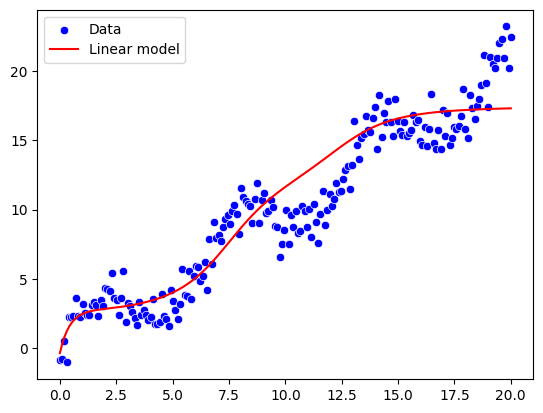

In [66]:
sns.scatterplot(x=X,y=y , color='blue',label='Data')
sns.lineplot(x=X,y=y_pred_m2.ravel(),color='red',label='Linear model')
